# Plot Covid-19 charts

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import seaborn as sns
import util
import pandas as pd
from datetime import datetime
from PIL import Image

## Loading data

In [2]:
df_covid_brazil = pd.read_csv('data/output/df_ts_epidemic_episodes.csv')
df_covid_brazil.DATA = pd.to_datetime(df_covid_brazil.DATA)

In [3]:
df_covid_other_countries = pd.read_csv('data/output/df_ts_epidemic_episodes_other_countries.csv')
df_covid_other_countries.date = pd.to_datetime(df_covid_other_countries.date)
df_covid_other_countries = df_covid_other_countries[df_covid_other_countries.location.isin(['United States', 'United Kingdom', 'Spain'])]

## Plot charts about Brazil

In [4]:
myFmt = mdates.DateFormatter('%m/%Y')
style = dict(color='black')
plt.rc('font', size=8)
sns.set_style("ticks")
colors = util.get_default_colors_categorical_seaborn()

### Figure 1

In [5]:
def plot_cases_and_deaths(df, date_column, case_column, average_case_column, death_column, average_death_column, file_identification):
    fig, ax = plt.subplots(2, 1, figsize=(util.centimeter_to_inch(13.2), util.centimeter_to_inch(13.2)), sharex=True)
    
    labels = ['New cases', 'New deaths']
    labels_y = ['a) New reported cases', 'b) New reported deaths']
    columns = [case_column, death_column]
    moving_average_columns = [average_case_column, average_death_column]
    
    for i in range(2):
        ax[i].plot(df[date_column], df[columns[i]], color='gray', label=labels[i])
        ax[i].plot(df[date_column], df[moving_average_columns[i]], color='black', label='7-day rolling average')
    
        ax[i].legend()
    
        ax[i].set(ylabel=labels_y[i])
    
    ax[1].xaxis.set_major_formatter(myFmt)
    ax[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    plt.xlabel('Month/Year')
    plt.xticks(rotation=20)
    
    fig.tight_layout()
    filename = 'images/serie_cases_deaths_' + file_identification
    plt.savefig(filename+'.pdf', bbox_inches="tight")
    plt.savefig(filename+'.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
    img = Image.open(filename+".tiff")
    img.save(filename+"_compressed.tiff", compression="tiff_lzw")
            
    plt.show()

In [6]:
df_covid_brazil.columns

Index(['Unnamed: 0', 'DATA', 'OBITOS_NOVOS_PAINEL', 'OBITOS_ACUMULADO_PAINEL',
       'CASOS_NOVOS_PAINEL', 'CASOS_ACUMULADO_PAINEL', 'day_of_week',
       'CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL',
       'OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL', 'OBITOS_NOVOS_SIM',
       'OBITOS_ACUMULADO_SIM', 'OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM',
       'POPULACAO_2022', 'TAXA_OBITOS_NOVOS_SIM',
       'TAXA_OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_SIM', 'TAXA_OBITOS_SIM',
       'NOVOS_CASOS_SRAG', 'NOVOS_OBITOS_SRAG',
       'CASOS_INICIO_SINTOMAS_ESTIMADOS', 'NUMERO_REPRODUCAO_EFETIVO_MEDIA',
       'NUMERO_REPRODUCAO_EFETIVO_VARIANCIA',
       'NUMERO_REPRODUCAO_EFETIVO_QUANTIL_0.025',
       'NUMERO_REPRODUCAO_EFETIVO_MEDIANA',
       'NUMERO_REPRODUCAO_EFETIVO_QUANTIL_0.975',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_MEDIA',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_VARIANCIA',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_QUANTIL_0.025',
       'NUMERO_REPRODUCAO_EFETIVO_ATRASADO_MEDIANA',
       'NUM

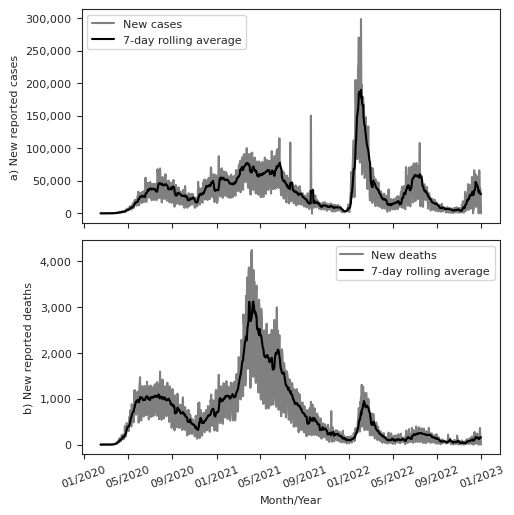

In [7]:
plot_cases_and_deaths(df_covid_brazil, 'DATA', 'CASOS_NOVOS_PAINEL', 'CASOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL', 'OBITOS_NOVOS_PAINEL', 'OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL', 'Brazil_panel')

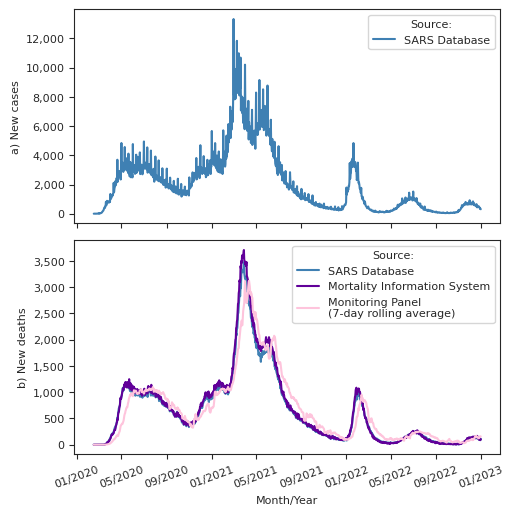

In [8]:
fig, ax = plt.subplots(2, 1, figsize=(util.centimeter_to_inch(13.2), util.centimeter_to_inch(13.2)), sharex=True)

df = df_covid_brazil
labels = [['SARS Database'], ['SARS Database', 'Mortality Information System', 'Monitoring Panel\n(7-day rolling average)']]
labels_y = ['a) New cases', 'b) New deaths']
columns = [['NOVOS_CASOS_SRAG'], ['NOVOS_OBITOS_SRAG','OBITOS_NOVOS_SIM', 'OBITOS_NOVOS_MEDIA_MOVEL_7_DIAS_PAINEL']]
list_colors = [[colors[1]], [colors[1], colors[2], colors[0]]]
date_column = 'DATA'

for i in range(2):
    for j in range(len(columns[i])):
        ax[i].plot(df[date_column], df[columns[i][j]], color=list_colors[i][j], label=labels[i][j])      
    ax[i].set(ylabel=labels_y[i])
    ax[i].legend(title='Source:')

ax[1].xaxis.set_major_formatter(myFmt)
ax[1].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax[0].yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.xlabel('Month/Year')
plt.xticks(rotation=20)

fig.tight_layout()
filename = 'images/serie_cases_deaths_different_sources'
plt.savefig(filename+'.pdf', bbox_inches="tight")
plt.savefig(filename+'.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
img = Image.open(filename+".tiff")
img.save(filename+"_compressed.tiff", compression="tiff_lzw")
        
plt.show()

### Figure 4

NameError: name 'case_valleys' is not defined

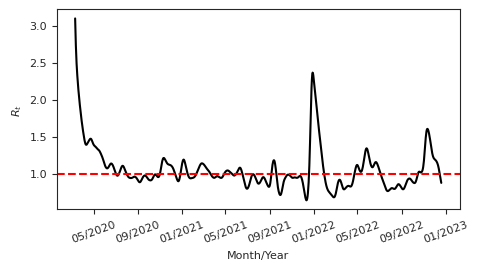

In [9]:
fig, ax = plt.subplots(figsize=(util.centimeter_to_inch(13.2), util.centimeter_to_inch(6.6)))
sns.lineplot(data=df_covid_brazil, x="DATA", y="NUMERO_REPRODUCAO_EFETIVO_MEDIA", markers=False, color='black')
plt.axhline(1, 0, 1, linestyle='--', color='red')
plt.ylabel('$R_{t}$')
ax.xaxis.set_major_formatter(myFmt)
plt.xlabel('Month/Year')
plt.xticks(rotation=20)
plt.axvline(case_valleys[0], 0, 1, linestyle=':', color='gray')
plt.axvline(case_valleys[1], 0, 1, linestyle=':', color='gray')
plt.axvline(case_valleys[2], 0, 1, linestyle=':', color='gray')
plt.savefig('images/reproduction_number.eps', bbox_inches="tight", transparent=True)
plt.savefig('images/reproduction_number.tiff', format='tiff', dpi=300, transparent=False, bbox_inches='tight')
img = Image.open("images/reproduction_number.tiff")
img.save("images/reproduction_number_compressed.tiff", compression="tiff_lzw")
plt.show()

## Plot charts about other countries

In [ ]:
df_covid_other_countries.columns

In [ ]:
for country in df_covid_other_countries.location.unique():
    print(country)
    df_country = df_covid_other_countries[df_covid_other_countries.location ==  country]
    plot_cases_and_deaths(df_country, 'date', 'new_cases', 'new_cases_moving_average', 'new_deaths', 'new_deaths_moving_average', country)